### About the task

The goal of this task is to acquire skills in working with text and training classification models on this data.

**Task:** In Switzerland, there are 4 dialects of the German language. The goal of the project is to predict the dialect based on a fragment of spoken language.

**Data:**

File descriptions:

- train.csv - training dataset
- test.csv - testing dataset
- sampleSubmission.csv - an example of the resulting file for submission to Kaggle

Column descriptions:

- Id - a unique index for the testing dataset (test.csv)
- Text - a fragment of speech
- Label - the target language class for a particular speech fragment (train.csv)
- Prediction - the predicted language class (sampleSubmission.csv)

Class descriptions:

`BE Bernese LU Lucerne ZH Zurich BS Basel`

**More about the data:** [https://www.kaggle.com/competitions/swiss-dialect-identification/data](https://www.kaggle.com/competitions/swiss-dialect-identification/data)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier


import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.activations import softmax, relu
from tensorflow.keras import regularizers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.regularizers import L2
from livelossplot import PlotLossesKeras
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

from sklearn.metrics import classification_report,confusion_matrix

## 1. Load dataframes using pandas. Perform preprocessing for Bag of Words.

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15616 entries, 0 to 15615
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    15616 non-null  object
 1   Label   15616 non-null  object
dtypes: object(2)
memory usage: 244.1+ KB


In [5]:
vectorizer = CountVectorizer()
trbag = vectorizer.fit_transform(train.Text)

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      2500 non-null   int64 
 1   Text    2500 non-null   object
dtypes: int64(1), object(1)
memory usage: 39.2+ KB


In [7]:
tebag = vectorizer.transform(test.Text)
tebag.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
le = LabelEncoder()
y_train = le.fit_transform(train.Label)
X_train = trbag

In [9]:
X_test = tebag

## 2. Train various models such as Random forest, Gradient boosting, SGD classifier, etc., and measure the accuracy metric on the validation data.

In [10]:
X_train.shape

(15616, 16292)

In [11]:
y_train.shape

(15616,)

In [12]:
X_test.shape

(2500, 16292)

In [13]:
X_train, X_tests,y_train,y_tests=train_test_split(trbag,y_train,random_state=42,test_size=20)

In [14]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_RFC=clf.predict(X_tests)

In [15]:
print(classification_report(y_pred_RFC,y_tests))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.50      1.00      0.67         2
           2       0.60      1.00      0.75         3
           3       0.88      0.78      0.82         9

    accuracy                           0.75        20
   macro avg       0.74      0.82      0.73        20
weighted avg       0.83      0.75      0.75        20



In [16]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred_GBC=clf.predict(X_tests)

In [17]:
print(classification_report(y_pred_GBC,y_tests))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.75      1.00      0.86         3
           2       0.60      1.00      0.75         3
           3       1.00      0.80      0.89        10

    accuracy                           0.85        20
   macro avg       0.84      0.89      0.84        20
weighted avg       0.90      0.85      0.86        20



In [18]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_SGD=sgd.predict(X_tests)

In [19]:
print(classification_report(y_pred_SGD,y_tests))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.50      1.00      0.67         2
           2       0.60      1.00      0.75         3
           3       1.00      0.73      0.84        11

    accuracy                           0.80        20
   macro avg       0.78      0.87      0.78        20
weighted avg       0.89      0.80      0.81        20



In [20]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [21]:
X_train, X_tests,y_train,y_tests=train_test_split(trbag,train.Label,random_state=42,test_size=0.1)

In [22]:
X_train= X_train.astype('int32')
X_tests= X_tests.astype('int32')

In [23]:
X_trainbn = np.array(X_train.toarray())
X_trainbn = X_trainbn.reshape(*X_trainbn.shape,1) 
ohe = OneHotEncoder(sparse=False)
y_trainbn = ohe.fit_transform(np.array(y_train).reshape(-1,1))
X_testbn = np.array(X_tests.toarray())
X_testbn = X_testbn.reshape(*X_testbn.shape,1)
y_testsbn = ohe.fit_transform(np.array(y_tests).reshape(-1,1))

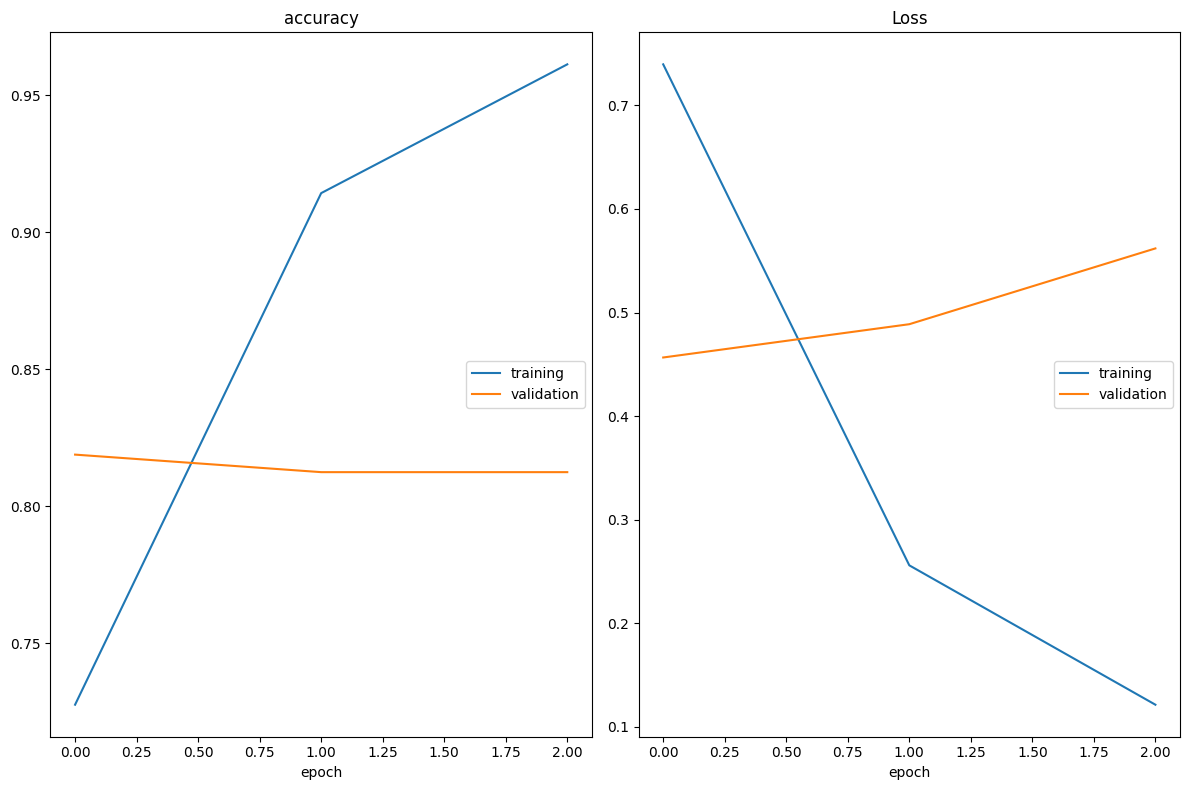

accuracy
	training         	 (min:    0.727, max:    0.961, cur:    0.961)
	validation       	 (min:    0.812, max:    0.819, cur:    0.812)
Loss
	training         	 (min:    0.121, max:    0.740, cur:    0.121)
	validation       	 (min:    0.457, max:    0.562, cur:    0.562)
282/282 [==============================] - 143s 507ms/step - loss: 0.1213 - accuracy: 0.9614 - val_loss: 0.5619 - val_accuracy: 0.8124


In [24]:
model = Sequential([
    Dense(16,input_shape=X_trainbn[0].shape,activation=relu,kernel_regularizer=L2(1e-4)),
    Dense(32,activation=relu,kernel_regularizer=L2(1e-4)),
    Dense(16,activation=relu,kernel_regularizer=L2(1e-4)),
    Flatten(),
    Dense(4,activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
callback = EarlyStopping(monitor='val_accuracy', patience=2)
history = model.fit(X_trainbn,y_trainbn,epochs=15,batch_size=50,verbose=1,validation_data=[X_testbn,y_testsbn],callbacks=[PlotLossesKeras(),callback])

In [25]:
res = model.evaluate(X_testbn,y_testsbn)

49/49 [==============================] - 6s 122ms/step - loss: 0.5619 - accuracy: 0.8124


In [26]:
res[1]

0.8124199509620667

### 3. Preprocess tf-idf and experiment with preprocessing parameters. Train models

In [27]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

<AxesSubplot:>

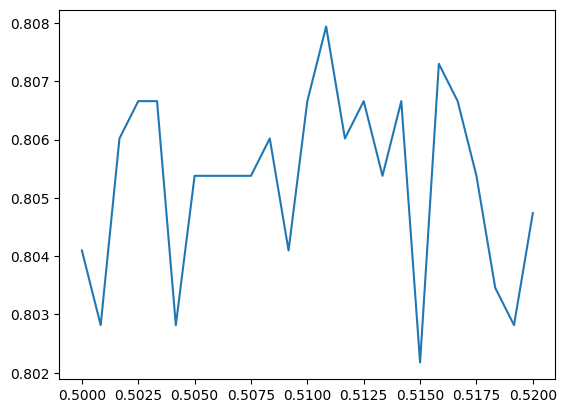

In [28]:
res = []
res2 = []
for i in np.linspace(0.5,0.52,25):
    vectorizer = TfidfVectorizer(ngram_range=(1,2), max_df=i)
    X_train = vectorizer.fit_transform(train.Text)
    X_train, X_test, y_train, y_test = train_test_split(X_train, train.Label, random_state = 42, test_size = 0.1)
    sgd = SGDClassifier(n_jobs = -1)
    sgd.fit(X_train,y_train)
    pred = sgd.predict(X_test)
    res.append(accuracy_score(pred,y_test))
    res2.append(i)

sns.lineplot(x=np.linspace(0.5,0.52,25),y=res)

In [29]:
np.array(res).max()

0.8079385403329066

In [30]:
vectorizer = TfidfVectorizer(max_df=0.8072983354673495)
X_train = vectorizer.fit_transform(train.Text)
X_test = vectorizer.transform(test.Text)
le = LabelEncoder()
y_train = le.fit_transform(train.Label)

In [31]:
X_trains, X_tests,y_trains,y_tests=train_test_split(X_train,y_train,random_state=42,test_size=20)

In [32]:
clf = RandomForestClassifier()
clf.fit(X_trains, y_trains)
y_pred_RFC=clf.predict(X_tests)
print(classification_report(y_pred_RFC,y_tests))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.75      1.00      0.86         3
           2       0.60      1.00      0.75         3
           3       0.88      0.88      0.88         8

    accuracy                           0.80        20
   macro avg       0.81      0.84      0.79        20
weighted avg       0.85      0.80      0.79        20



In [35]:
sgd = SGDClassifier()
sgd.fit(X_trains, y_trains)
y_pred_SGD=sgd.predict(X_tests)
print(classification_report(y_pred_SGD,y_tests))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.50      1.00      0.67         2
           2       0.60      1.00      0.75         3
           3       1.00      0.73      0.84        11

    accuracy                           0.80        20
   macro avg       0.78      0.87      0.78        20
weighted avg       0.89      0.80      0.81        20



### 4.Let's try to use Neural Network for this task

In [36]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [37]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=0.8072983354673495)
X_train = vectorizer.fit_transform(train.Text)
X_test = vectorizer.transform(test.Text)
le = LabelEncoder()
y_train = le.fit_transform(train.Label)

In [38]:
X_train, X_tests,y_train,y_tests=train_test_split(X_train,train.Label,random_state=42,test_size=0.1)

In [39]:
X_train= X_train.astype('float32')
X_tests= X_tests.astype('float32')

In [40]:
X_trainbn = np.array(X_train.toarray())
X_trainbn = X_trainbn.reshape(*X_trainbn.shape,1) 
ohe = OneHotEncoder(sparse=False)
y_trainbn = ohe.fit_transform(np.array(y_train).reshape(-1,1))
X_testbn = np.array(X_tests.toarray())
X_testbn = X_testbn.reshape(*X_testbn.shape,1)
y_testsbn = ohe.fit_transform(np.array(y_tests).reshape(-1,1))

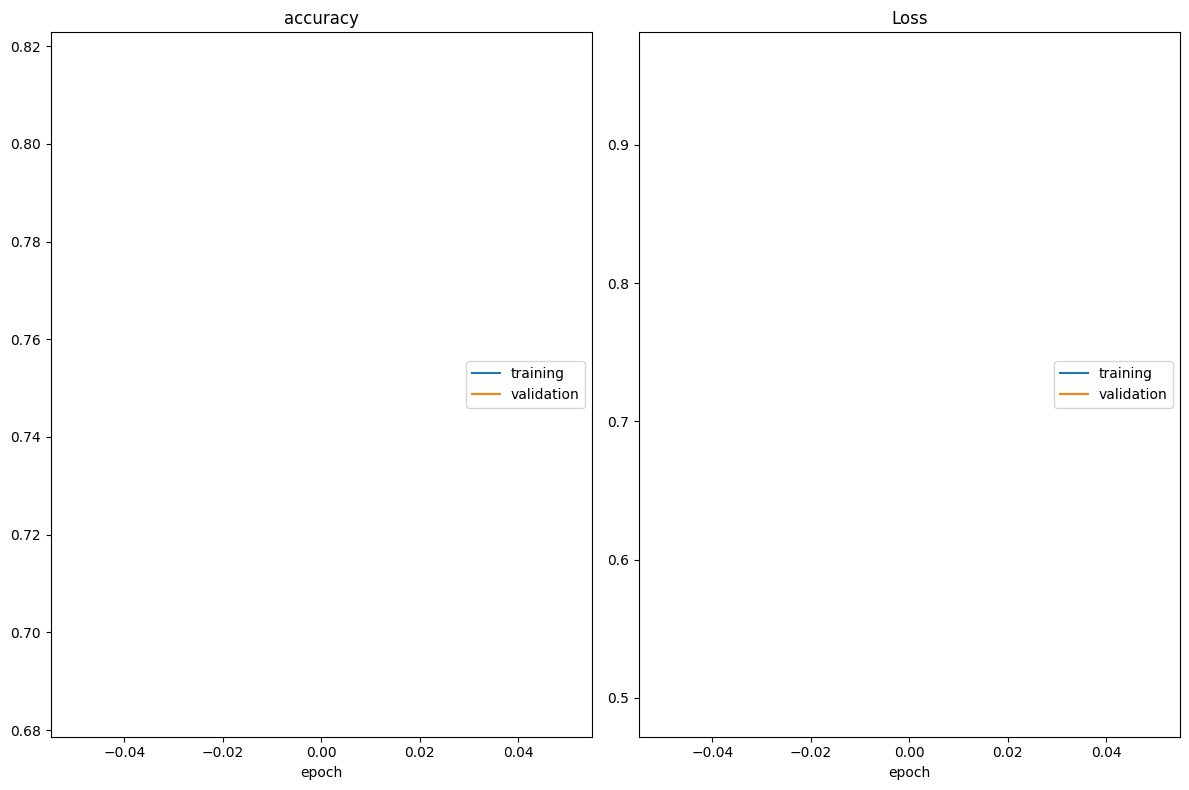

accuracy
	training         	 (min:    0.685, max:    0.685, cur:    0.685)
	validation       	 (min:    0.816, max:    0.816, cur:    0.816)
Loss
	training         	 (min:    0.958, max:    0.958, cur:    0.958)
	validation       	 (min:    0.495, max:    0.495, cur:    0.495)
282/282 [==============================] - 670s 2s/step - loss: 0.9583 - accuracy: 0.6852 - val_loss: 0.4951 - val_accuracy: 0.8163


In [41]:
model = Sequential([
    Dense(16,input_shape=X_trainbn[0].shape,activation=relu,kernel_regularizer=L2(1e-4)),
    Dense(32,activation=relu,kernel_regularizer=L2(1e-4)),
    Dense(16,activation=relu,kernel_regularizer=L2(1e-4)),
    Flatten(),
    Dense(4,activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# callback = EarlyStopping(monitor='val_accuracy', patience=2)
history = model.fit(X_trainbn,y_trainbn,epochs=1,batch_size=50,verbose=1,validation_data=[X_testbn,y_testsbn],callbacks=[PlotLossesKeras(),callback])

In [42]:
res = model.evaluate(X_testbn,y_testsbn)
res[1]

49/49 [==============================] - 28s 558ms/step - loss: 0.4951 - accuracy: 0.8163


0.8162612318992615

### 5. Let's submit the results of NN to https://www.kaggle.com/competitions/swiss-dialect-identification/overview

In [44]:
test = pd.read_csv('data/test.csv')
X_test = vectorizer.transform(test.Text)
X_test = np.array(X_test.toarray())
X_test = X_test.reshape(*X_test.shape,1)
pred = model.predict(X_test)

79/79 [==============================] - 45s 550ms/step


In [45]:
pred_label = ohe.inverse_transform(pred).reshape(1,-1)[0]
pd.DataFrame({"Id":test.Id,"Prediction":pred_label}).to_csv('imya.csv',index=False)

Public score 0.83066 private score 0.80857

In [46]:
pred_label

array(['ZH', 'LU', 'LU', ..., 'LU', 'ZH', 'BE'], dtype=object)

Help links:

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- https://www.nltk.org/api/nltk.lm.html
- https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92